<a href="https://colab.research.google.com/github/NVDS333/Memory-Chain/blob/main/TSP_GeneticAlgorthm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Travelling Salesman Problem using Genetic Algorithm (Python)

Source

https://medium.com/aimonks/traveling-salesman-problem-tsp-using-genetic-algorithm-fea640713758

Modified slightly due to minor syntax issues

**run this section only once at the start of each session, since its just to define the functions that the genetic algo will use

In [ ]:
import matplotlib.pyplot as plt
from itertools import permutations, combinations # changed the 'and' to a comma
from random import shuffle
import random
import numpy as np
import statistics
import pandas as pd
import seaborn as SNs

def initial_population(cities_list, n_population = 250):

    """
    Generating initial population of cities randomly selected from all
    possible permutations  of the given cities
    Input:
    1- Cities list
    2. Number of population
    Output:
    Generated lists of cities
    """

    population_perms = []
    possible_perms = list(permutations(cities_list)) # generates all possible arrangements/routes based on the given parameter(cities_list)
    random_ids = random.sample(range(0,len(possible_perms)),n_population) #-->removed extra closing bracket || returns a list containing randomised list of indices based on the number of possible permutations
    for i in random_ids:
        population_perms.append(list(possible_perms[i])) # for loop that just appends a list with the permutations in possible_perms

    return population_perms # function returns list containing the randomised list of permutations

def dist_two_cities(city_1, city_2):

    """
    Calculating the distance between two cities
    Input:
    1- City one name
    2- City two name
    Output:
    Calculated Euclidean distance between two cities
    """

    city_1_coords = city_coords[city_1] # gets coordinates for city 1
    city_2_coords = city_coords[city_2] # get coordinate for city 2
    return np.sqrt(np.sum((np.array(city_1_coords) - np.array(city_2_coords))**2)) # uses uni-dimensional arrays to simplify calculations

def total_dist_individual(individual): #calculates the total distance travelled throughout a single set of permutations

    """
    Calculating the total distance traveled by individual,
    one individual means one possible solution (1 permutation)
    Input:
    1- Individual list of cities
    Output:
    Total distance traveled
    """

    total_dist = 0 # defining a variable to store total distance
    for i in range(0, len(individual)): # loop between the indices of a set of permutations generated by the initial_population function
        if(i == len(individual) - 1): # if its the last city of the list, then calculate its distance to the first city of the list. (Returning to the starting point, like a circle)
            total_dist += dist_two_cities(individual[i], individual[0]) # calculates and adds the value to total_dist
        else:
            total_dist += dist_two_cities(individual[i], individual[i+1]) # else, calculate distance between current city and the next, add value to total_dist
    return total_dist # function returns total distance

def fitness_prob(population):
    """
    Calculating the fitness probability
    Input:
    1- Population
    Output:
    Population fitness probability
    """
    total_dist_all_individuals = []
    for i in range (0, len(population)):
        total_dist_all_individuals.append(total_dist_individual(population[i]))

    max_population_cost = max(total_dist_all_individuals)
    population_fitness = max_population_cost - total_dist_all_individuals
    population_fitness_sum = sum(population_fitness)
    population_fitness_probs = population_fitness / population_fitness_sum
    return population_fitness_probs

def roulette_wheel(population, fitness_probs):
    """
    Implement a selection strategy based on proportionate roulette wheel
    Selection.
    Input:
    1- population
    2: fitness probabilities
    Output:
    selected individual
    """
    population_fitness_probs_cumsum = fitness_probs.cumsum()
    bool_prob_array = population_fitness_probs_cumsum < np.random.uniform(0,1,1)
    selected_individual_index = len(bool_prob_array[bool_prob_array == True]) - 1
    return population[selected_individual_index]

def crossover(parent_1, parent_2):
    """
    Implement mating strategy using simple crossover between two parents
    Input:
    1- parent 1
    2- parent 2
    Output:
    1- offspring 1
    2- offspring 2
    """
    n_cities_cut = len(cities_names) - 1
    cut = round(random.uniform(1, n_cities_cut))
    offspring_1 = []
    offspring_2 = []

    offspring_1 = parent_1 [0:cut]
    offspring_1 += [city for city in parent_2 if city not in offspring_1] #is not in --> not in


    offspring_2 = parent_2 [0:cut]
    offspring_2 += [city for city in parent_1 if city not in offspring_2] #is not in --> not in


    return offspring_1, offspring_2

def mutation(offspring):
    """
    Implement mutation strategy in a single offspring
    Input:
    1- offspring individual
    Output:
    1- mutated offspring individual
    """
    n_cities_cut = len(cities_names) - 1
    index_1 = round(random.uniform(0,n_cities_cut))
    index_2 = round(random.uniform(0,n_cities_cut))

    temp = offspring [index_1]
    offspring[index_1] = offspring[index_2]
    offspring[index_2] = temp
    return(offspring)

Main function + execute.

n_population - number of candidate solutions (potential solutions)

crossover_per - probability of crossovers (recombinations)

mutations_per - probability of mutations (random swaps in paths etc.)

n_generations - number of generations (how many iterations)

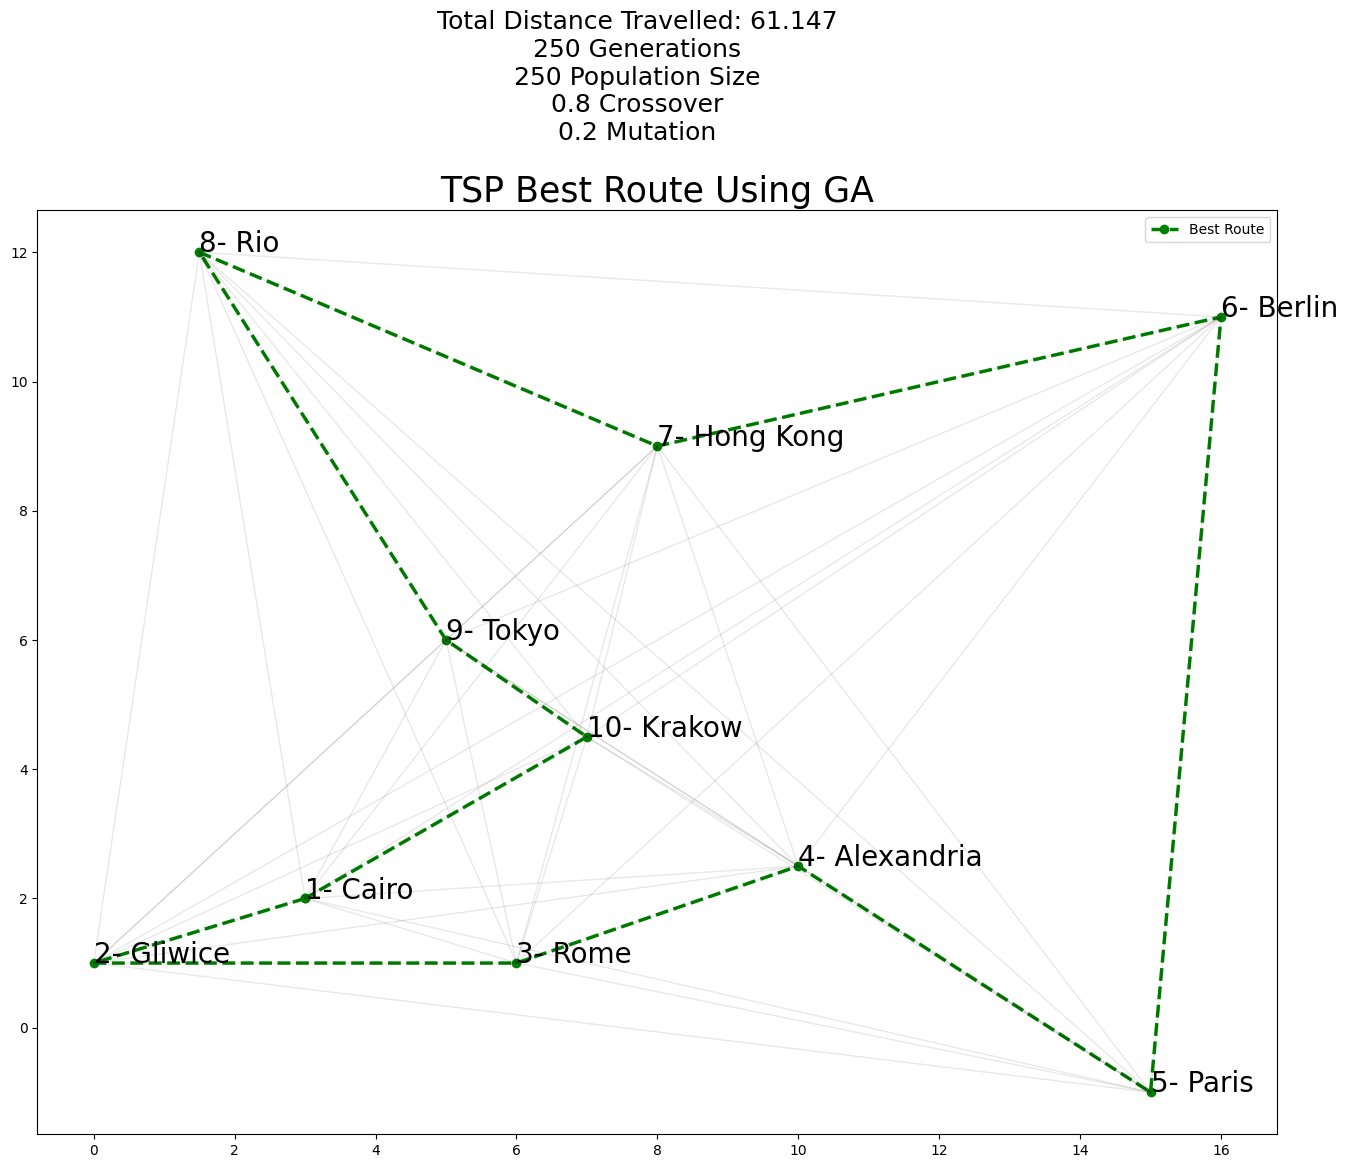

In [ ]:
#Modify these parameters
n_population = 250
crossover_per = 0.8
mutation_per = 0.2
n_generations = 250

x = [0,3,6,7,15,10,16,5,8,1.5]
y = [1,2,1,4.5,-1,2.5,11,6,9,12]
cities_names = ["Gliwice", "Cairo", "Rome", "Krakow", "Paris",
                "Alexandria", "Berlin", "Tokyo", "Hong Kong", "Rio"]
city_coords = dict(zip(cities_names, zip(x, y)))

def run_ga(cities_names, n_population, n_generations,
           crossover_per, mutation_per):

    population = initial_population(cities_names, n_population)
    fitness_probs = fitness_prob(population)

    parents_list = []
    for i in range(0, int(crossover_per * n_population)):
        parents_list.append(roulette_wheel(population,
                                           fitness_probs))

    offspring_list = []
    for i in range(0,len(parents_list), 2):
        offspring_1, offspring_2 = crossover(parents_list[i],
                                             parents_list[i+1])

    #     print(offspring_1)
    #     print(offspring_2)
    #     print()

        mutate_threashold = random.random()
        if(mutate_threashold > (1-mutation_per)):
            offspring_1 = mutation(offspring_1)
    #         print("Offspring 1 mutated", offspring_1)

        mutate_threashold = random.random()
        if(mutate_threashold > (1-mutation_per)):
            offspring_2 = mutation(offspring_2)
    #         print("Offspring 2 mutated", offspring_2)


        offspring_list.append(offspring_1)
        offspring_list.append(offspring_2)

    mixed_offspring = parents_list + offspring_list

    fitness_probs = fitness_prob(mixed_offspring)
    sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
    best_fitness_indices = sorted_fitness_indices[0:n_population]
    best_mixed_offsrping = []
    for i in best_fitness_indices:
        best_mixed_offsrping.append(mixed_offspring[i])


    for i in range(0, n_generations):
        # if (i%10 == 0):
            # print("Generation: ", i)

        fitness_probs = fitness_prob(best_mixed_offsrping)
        parents_list = []
        for i in range(0, int(crossover_per * n_population)):
            parents_list.append(roulette_wheel(best_mixed_offsrping,
                                               fitness_probs))

        offspring_list = []
        for i in range(0,len(parents_list), 2):
            offspring_1, offspring_2 = crossover(parents_list[i],
                                                 parents_list[i+1])

            mutate_threashold = random.random()
            if(mutate_threashold > (1-mutation_per)):
                offspring_1 = mutation(offspring_1)

            mutate_threashold = random.random()
            if(mutate_threashold > (1-mutation_per)):
                offspring_2 = mutation(offspring_2)

            offspring_list.append(offspring_1)
            offspring_list.append(offspring_2)


        mixed_offspring = parents_list + offspring_list
        fitness_probs = fitness_prob(mixed_offspring)
        sorted_fitness_indices = np.argsort(fitness_probs)[::-1]
        best_fitness_indices = sorted_fitness_indices[0:int(0.8*n_population)]

        best_mixed_offsrping = []
        for i in best_fitness_indices:
            best_mixed_offsrping.append(mixed_offspring[i])

        old_population_indices = [random.randint(0, (n_population - 1))
                                  for j in range(int(0.2*n_population))]
        for i in old_population_indices:
#             print(i)
            best_mixed_offsrping.append(population[i])

        random.shuffle(best_mixed_offsrping)

    return best_mixed_offsrping

#####################

best_mixed_offsrping = run_ga(cities_names, n_population,
                              n_generations, crossover_per, mutation_per)

total_dist_all_individuals = []
for i in range(0, n_population):
    total_dist_all_individuals.append(total_dist_individual(best_mixed_offsrping[i]))

index_minimum = np.argmin(total_dist_all_individuals)
minimum_distance = min(total_dist_all_individuals)

shortest_path = best_mixed_offsrping[index_minimum]

x_shortest = []
y_shortest = []
for city in shortest_path:
    x_value, y_value = city_coords[city]
    x_shortest.append(x_value)
    y_shortest.append(y_value)

x_shortest.append(x_shortest[0])
y_shortest.append(y_shortest[0])

fig, ax = plt.subplots()
ax.plot(x_shortest, y_shortest, '--go', label='Best Route', linewidth=2.5)
plt.legend()

for i in range(len(x)):
    for j in range(i + 1, len(x)):
        ax.plot([x[i], x[j]], [y[i], y[j]], 'k-', alpha=0.09, linewidth=1)

plt.title(label="TSP Best Route Using GA",
          fontsize=25,
          color="k")

str_params = '\n'+str(n_generations)+' Generations\n'+str(n_population)+' Population Size\n'+str(crossover_per)+' Crossover\n'+str(mutation_per)+' Mutation'
plt.suptitle("Total Distance Travelled: "+
             str(round(minimum_distance, 3)) +
             str_params, fontsize=18, y = 1.047)

for i, txt in enumerate(shortest_path):
    ax.annotate(str(i+1)+ "- " + txt, (x_shortest[i], y_shortest[i]), fontsize= 20)

fig.set_size_inches(16, 12)
# plt.grid(color='k', linestyle='dotted')
plt.savefig('solution.png')
plt.show()

random live visualisation courtesy of chatgpt (will remove for presentation, but you can run it cause it looks cool)

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import imageio
import os

# --- Problem setup (random TSP) ---
n_cities = 20
cities_coordinates = {i: (random.randint(0, 100), random.randint(0, 100)) for i in range(n_cities)}
cities_names = list(cities_coordinates.keys())

# --- GA Parameters ---
population_size = 50
n_generations = 150
mutation_rate = 0.8

# --- Fitness function (total route length) ---
def route_length(route):
    dist = 0
    for i in range(len(route)):
        x1, y1 = cities_coordinates[route[i]]
        x2, y2 = cities_coordinates[route[(i+1) % len(route)]]
        dist += math.sqrt((x1-x2)**2 + (y1-y2)**2)
    return dist

# --- Initialize population ---
def init_population():
    population = []
    for _ in range(population_size):
        route = cities_names[:]
        random.shuffle(route)
        population.append(route)
    return population

# --- Selection (tournament) ---
def selection(population):
    k = 5
    selected = random.sample(population, k)
    selected.sort(key=route_length)
    return selected[0]

# --- Crossover (Order Crossover style) ---
def crossover(parent_1, parent_2):
    cut = random.randint(1, len(parent_1) - 2)
    offspring_1 = parent_1[:cut] + [city for city in parent_2 if city not in parent_1[:cut]]
    offspring_2 = parent_2[:cut] + [city for city in parent_1 if city not in parent_2[:cut]]
    return offspring_1, offspring_2

# --- Mutation (swap two cities) ---
def mutate(route):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(route)), 2)
        route[i], route[j] = route[j], route[i]
    return route

# --- Plotting function ---
def plot_route(route, gen, save_path):
    x = [cities_coordinates[city][0] for city in route] + [cities_coordinates[route[0]][0]]
    y = [cities_coordinates[city][1] for city in route] + [cities_coordinates[route[0]][1]]
    plt.figure(figsize=(6,6))
    plt.plot(x, y, 'o-', color="blue")
    plt.title(f"Generation {gen} - Best Length: {route_length(route):.2f}")
    plt.savefig(save_path)
    plt.close()

# --- GA Execution ---
population = init_population()
frames_dir = "frames"
if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)

for gen in range(n_generations):
    new_population = []
    population.sort(key=route_length)  # elitism
    best_route = population[0]

    # Save plot of best route
    plot_route(best_route, gen, f"{frames_dir}/gen_{gen}.png")

    # Reproduction
    while len(new_population) < population_size:
        parent_1 = selection(population)
        parent_2 = selection(population)
        child_1, child_2 = crossover(parent_1, parent_2)
        child_1 = mutate(child_1)
        child_2 = mutate(child_2)
        new_population.extend([child_1, child_2])

    population = new_population

# --- Make GIF ---
with imageio.get_writer('tsp_optimization.gif', mode='I', duration=0.3) as writer:
    for gen in range(n_generations):
        image = imageio.imread(f"{frames_dir}/gen_{gen}.png")
        writer.append_data(image)

print("GIF saved as tsp_optimization.gif ✅")


/tmp/ipython-input-1873997686.py:94: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"{frames_dir}/gen_{gen}.png")


GIF saved as tsp_optimization.gif ✅


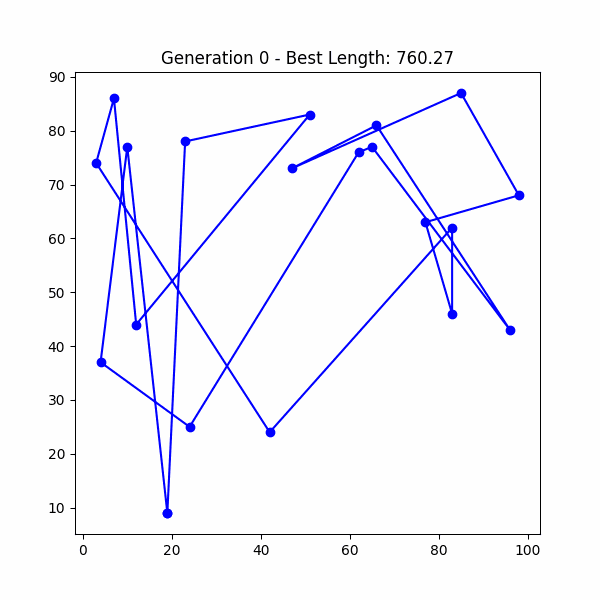

In [ ]:
from IPython.display import Image
Image(filename="tsp_optimization.gif")
